In [1]:
!pip install torch==2.3.0 torchvision
!pip install opencv-python supervision matplotlib

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8

In [2]:
!which nvcc

/usr/local/cuda/bin/nvcc


In [3]:
import os
os.environ["CUDA_HOME"] = "/usr/local/cuda"

In [4]:
!echo $CUDA_HOME

/usr/local/cuda


In [5]:
!git clone https://github.com/facebookresearch/sam2.git

Cloning into 'sam2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 40.51 MiB/s, done.
Resolving deltas: 100% (381/381), done.


In [6]:
!pip install -e /content/sam2


Obtaining file:///content/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using ca

In [7]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [8]:
#RESTART SESSION AFTER RUNNING THE PREVIOUS CELL ONLY IF PROMPTED. You can then run the rest of the cells normally

In [9]:
%cd /content
!mkdir weights
%cd weights

/content
/content/weights


In [10]:
!wget -O sam2_hiera_large.pt https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

--2025-10-05 12:25:15--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.96, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 897952466 (856M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_large.pt’

sam2_hiera_large.pt 100%[===================>] 856.35M   213MB/s    in 4.0s    

2025-10-05 12:25:19 (216 MB/s) - ‘sam2_hiera_large.pt’ saved [897952466/897952466]



In [11]:
%cd /content

/content


In [12]:
!pip install opencv-python-headless imageio[ffmpeg]

Saving f1.jpg to f1.jpg


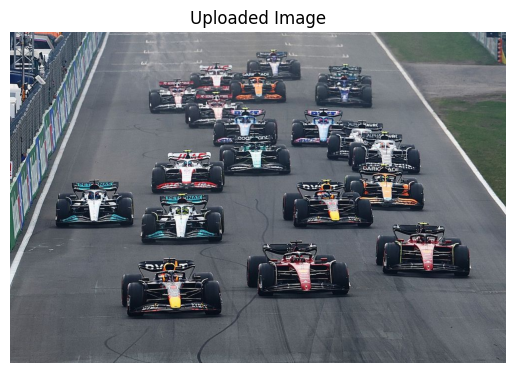

In [13]:
from google.colab import files
uploaded = files.upload()

IMAGE_PATH = list(uploaded.keys())[0]

from PIL import Image
img = Image.open(IMAGE_PATH).convert("RGB")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [14]:
from transformers import GroundingDinoProcessor, GroundingDinoForObjectDetection
import torch
from PIL import Image

processor = GroundingDinoProcessor.from_pretrained("IDEA-Research/grounding-dino-base")
model = GroundingDinoForObjectDetection.from_pretrained("IDEA-Research/grounding-dino-base")

if torch.cuda.is_available():
    model = model.cuda()

image = Image.open(IMAGE_PATH).convert("RGB")
prompt = input("Enter the prompt for object detection: ")

inputs = processor(images=image, text=prompt, return_tensors="pt")
inputs = {k: v.to(model.device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]], device=model.device)
results = processor.post_process_grounded_object_detection(
    outputs,
    inputs["input_ids"],
    0.10,
    0.10,
    target_sizes=[image.size[::-1]]
)[0]

print("Boxes:", results["boxes"])
print("Scores:", results["scores"])
print("Labels:", results["labels"])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/933M [00:00<?, ?B/s]

Enter the prompt for object detection: f1 car
Boxes: tensor([[222.8947, 454.7045, 428.4786, 574.6153],
        [475.3298, 418.5534, 685.4872, 532.4575],
        [ 90.5652, 297.3257, 250.2437, 392.9540],
        [735.9280, 382.3063, 929.1449, 492.6980],
        [548.6020, 292.5177, 732.5778, 394.2299],
        [284.5596, 236.9401, 433.0000, 324.9681],
        [262.3015, 324.3080, 432.4601, 425.2737],
        [674.5585, 279.7917, 835.8253, 358.8840],
        [284.4590, 259.2120, 432.9395, 324.7557],
        [614.8974,  64.1892, 730.4547, 151.0018],
        [422.5280, 222.6246, 565.5055, 287.6468],
        [477.0320,  34.4361, 585.7280,  95.6890],
        [408.2274, 154.3007, 539.2621, 230.1028],
        [684.4214, 217.6823, 827.4789, 286.5623],
        [566.8436, 153.5372, 673.8942, 230.4413],
        [447.1770,  87.7993, 557.0273, 142.9783],
        [278.8656,  58.8227, 557.2090, 164.3695],
        [351.7350, 135.4882, 476.2533, 192.2265],
        [638.3205, 195.2000, 790.1910, 258.7192

/usr/local/lib/python3.12/dist-packages/transformers/models/grounding_dino/processing_grounding_dino.py:94: FutureWarning: The key `labels` is will return integer ids in `GroundingDinoProcessor.post_process_grounded_object_detection` output since v4.51.0. Use `text_labels` instead to retrieve string object names.
  warnings.warn(self.message, FutureWarning)


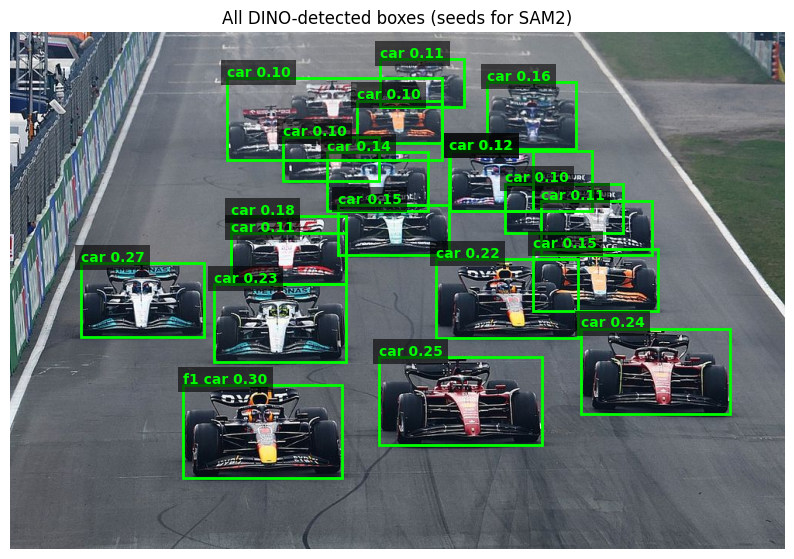

In [15]:
import matplotlib.pyplot as plt
import numpy as np


boxes = results["boxes"]
scores = results["scores"] if "scores" in results else None
labels = results["labels"] if "labels" in results else []

if hasattr(boxes, "cpu"):
    boxes = boxes.cpu().numpy()
if scores is not None and hasattr(scores, "cpu"):
    scores = scores.cpu().numpy()

plt.figure(figsize=(10, 10))
plt.imshow(np.array(img))
ax = plt.gca()

for i, box in enumerate(boxes):
    x0, y0, x1, y1 = box
    if scores is not None and scores[i] < 0.1:
        continue
    rect = plt.Rectangle((x0, y0), x1-x0, y1-y0, edgecolor='lime', linewidth=2, fill=False)
    ax.add_patch(rect)
    label = str(labels[i]) if i < len(labels) else ""
    if scores is not None:
        plt.text(
            x0, y0 - 2,
            f"{label} {scores[i]:.2f}" if label else f"{scores[i]:.2f}",
            color='lime', fontsize=10, weight='bold',
            bbox=dict(facecolor='black', alpha=0.6, edgecolor='none')
        )
    elif label:
        plt.text(
            x0, y0 - 2,
            label,
            color='lime', fontsize=10, weight='bold',
            bbox=dict(facecolor='black', alpha=0.6, edgecolor='none')
        )

plt.title("All DINO-detected boxes (seeds for SAM2)")
plt.axis('off')
plt.show()


In [16]:
%cd /content

/content


In [17]:
import_guard_file = "/content/sam2/sam2/build_sam.py"

with open(import_guard_file, 'r') as f:
    content = f.read()

patched_content = content.replace(
    'if os.path.isdir(os.path.join(sam2.__path__[0], "sam2")):',
    'if False:  # PATCHED - disabled directory check'
)

with open(import_guard_file, 'w') as f:
    f.write(patched_content)

print("Patched build_sam.py")


Patched build_sam.py


In [18]:
import sys
modules_to_remove = [k for k in sys.modules.keys() if k.startswith('sam2')]
for mod in modules_to_remove:
    del sys.modules[mod]

sys.path.insert(0, '/content/sam2')


In [19]:
import os
sys.path.insert(0, '/content/sam2/sam2')

os.chdir('/content/sam2/sam2')

from build_sam import build_sam2
from sam2_image_predictor import SAM2ImagePredictor


In [20]:
SAM2_CONFIG = "/configs/sam2/sam2_hiera_l.yaml"
SAM2_WEIGHTS = "/content/weights/sam2_hiera_large.pt"
DEVICE = "cuda"
sam2_model = build_sam2(SAM2_CONFIG, ckpt_path=SAM2_WEIGHTS, device=DEVICE)
predictor = SAM2ImagePredictor(sam2_model)


In [21]:
img_np = np.array(img)
predictor.set_image(img_np)

masks, scores, logits = predictor.predict(
    box=boxes,
    multimask_output= False
)

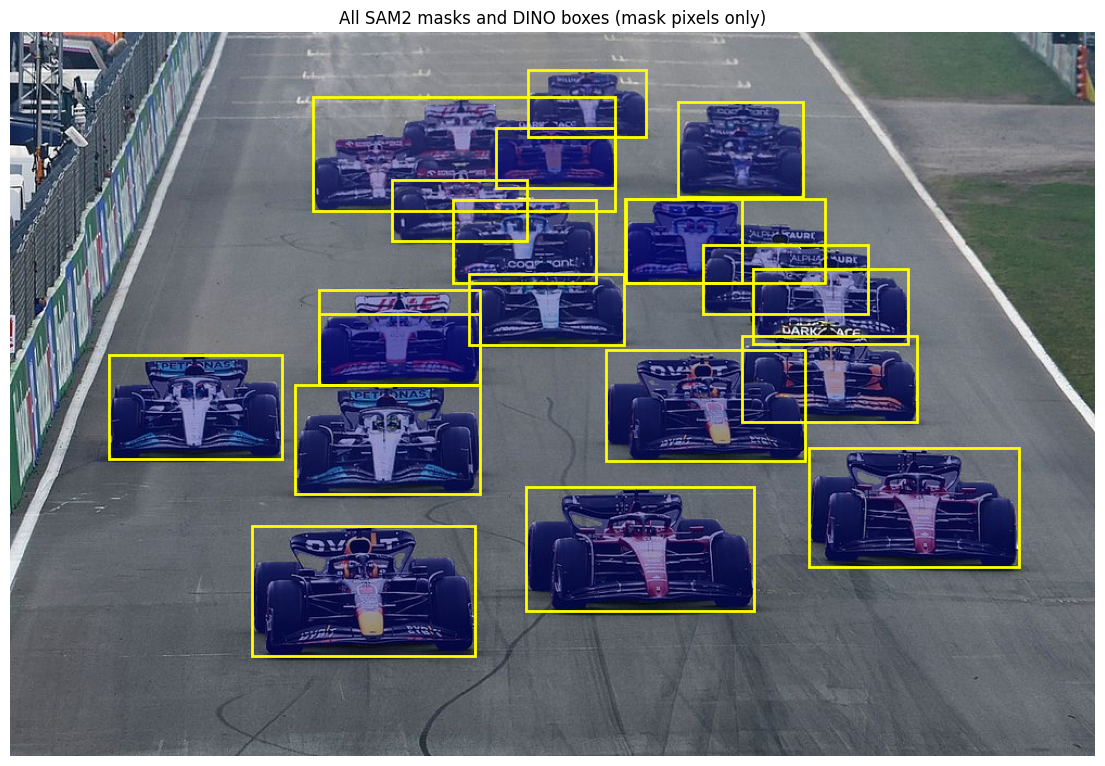

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))
plt.imshow(np.array(img))

for i in range(len(masks)):
    mask_rgb = np.ma.masked_where(masks[i] == 0, masks[i])
    plt.imshow(mask_rgb.squeeze(), cmap='jet', alpha=0.4)

    x0, y0, x1, y1 = boxes[i]
    plt.gca().add_patch(
        plt.Rectangle((x0, y0), x1-x0, y1-y0, edgecolor='yellow', linewidth=2, fill=False)
    )

plt.title("All SAM2 masks and DINO boxes (mask pixels only)")
plt.axis('off')
plt.show()


In [23]:
#VIDEO SEGMENTATION:

In [24]:
%cd /content

/content


In [25]:
import cv2
def extract_frames(video_path, out_dir="frames", max_frames=300):
    os.makedirs(out_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    frame_paths = []
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    skip = max(1, total // max_frames)
    while True:
        ret, frame = cap.read()
        if not ret: break
        if frame_count % skip == 0:
            fp = os.path.join(out_dir, f"{frame_count:05d}.jpg")
            cv2.imwrite(fp, frame)
            frame_paths.append(fp)
        frame_count += 1
        if len(frame_paths) >= max_frames: break
    cap.release()
    return frame_paths, cap.get(cv2.CAP_PROP_FPS)


In [26]:
%cd /content/weights
!wget -O sam2_hiera_small.pt https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
%cd ..


/content/weights
--2025-10-05 12:30:21--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.108, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184309650 (176M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_small.pt’

sam2_hiera_small.pt 100%[===================>] 175.77M   220MB/s    in 0.8s    

2025-10-05 12:30:22 (220 MB/s) - ‘sam2_hiera_small.pt’ saved [184309650/184309650]

/content


In [27]:
"""%cd /content/sam2/sam2
SAM2_VID_CONFIG = "/configs/sam2/sam2_hiera_s.yaml"
SAM2_VID_WEIGHTS = "/content/weights/sam2_hiera_small.pt"
%cd ..
%cd .."""

'%cd /content/sam2/sam2\nSAM2_VID_CONFIG = "/configs/sam2/sam2_hiera_s.yaml"\nSAM2_VID_WEIGHTS = "/content/weights/sam2_hiera_small.pt"\n%cd ..\n%cd ..'

In [28]:
"""def sam2_vid_predictor():
    sam2_video_model = build_sam2(SAM2_VID_CONFIG, ckpt_path=SAM2_VID_WEIGHTS, device=DEVICE, mode="eval")
    sam2_video_model = sam2_video_model.cuda()

    video_predictor = SAM2VideoPredictor(
        image_encoder=sam2_video_model.image_encoder,
        memory_attention=sam2_video_model.memory_attention,
        memory_encoder=sam2_video_model.memory_encoder,
        fill_hole_area=0,
        non_overlap_masks=False,
        clear_non_cond_mem_around_input=False,
        add_all_frames_to_correct_as_cond=False
    )

    video_predictor = video_predictor.cuda()

    return video_predictor"""


'def sam2_vid_predictor():\n    sam2_video_model = build_sam2(SAM2_VID_CONFIG, ckpt_path=SAM2_VID_WEIGHTS, device=DEVICE, mode="eval")\n    sam2_video_model = sam2_video_model.cuda()\n\n    video_predictor = SAM2VideoPredictor(\n        image_encoder=sam2_video_model.image_encoder,\n        memory_attention=sam2_video_model.memory_attention,\n        memory_encoder=sam2_video_model.memory_encoder,\n        fill_hole_area=0,\n        non_overlap_masks=False,\n        clear_non_cond_mem_around_input=False,\n        add_all_frames_to_correct_as_cond=False\n    )\n\n    video_predictor = video_predictor.cuda()\n\n    return video_predictor'

In [29]:
def video_segmentation_simple(video_path, text_prompt, out_dir="vidseg_output"):
    frames_dir = os.path.join(out_dir, "frames")
    frames, fps = extract_frames(video_path, frames_dir)

    print(f"Processing {len(frames)} frames...")

    device = next(model.parameters()).device

    first_frame = Image.open(frames[0]).convert("RGB")
    inputs = processor(images=first_frame, text=text_prompt, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.tensor([first_frame.size[::-1]], device=device)
    results = processor.post_process_grounded_object_detection(
        outputs, inputs["input_ids"], 0.10, 0.10, target_sizes=[first_frame.size[::-1]]
    )[0]

    boxes = results["boxes"].cpu().numpy()
    scores = results["scores"].cpu().numpy()

    print(f"Found {len(boxes)} objects")

    segmasks = {}

    for frame_idx, frame_path in enumerate(frames):
        if frame_idx % 20 == 0:
            print(f"Processing frame {frame_idx+1}/{len(frames)}")

        frame_img = Image.open(frame_path).convert("RGB")
        frame_np = np.array(frame_img)

        predictor.set_image(frame_np)

        frame_masks = {}
        for obj_id, (box, score) in enumerate(zip(boxes, scores)):
            if score > 0.2:
                masks, _, _ = predictor.predict(
                    box=box[np.newaxis, :],
                    multimask_output=False
                )
                if masks.size > 0:
                    frame_masks[obj_id + 1] = masks[0]

        if frame_masks:
            segmasks[frame_idx] = frame_masks

    print(f"Segmentation complete. Processed {len(segmasks)} frames with objects.")
    return segmasks, frames, fps


In [30]:
"""def video_segmentation(video_path, text_prompt, out_dir="vidseg_output"):
    frames_dir = os.path.join(out_dir, "frames")
    frames, fps = extract_frames(video_path, frames_dir)

    print("Frames extracted successfully")

    predictor = sam2_vid_predictor()
    print("SAM2 video predictor created")

    device = next(model.parameters()).device

    first_frame = Image.open(frames[0]).convert("RGB")
    inputs = processor(images=first_frame, text=text_prompt, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    print("Model device:", device)
    print("inputs pixel_values device:", inputs["pixel_values"].device)

    with torch.no_grad():
        outputs = model(**inputs)
    print("GroundingDINO completed successfully")

    target_sizes = torch.tensor([first_frame.size[::-1]], device=device)
    results = processor.post_process_grounded_object_detection(
        outputs, inputs["input_ids"], 0.25, 0.25, target_sizes=[first_frame.size[::-1]]
    )[0]
    print("Post-processing completed")

    boxes = results["boxes"]
    scores = results["scores"]
    boxes_np = boxes.cpu().numpy()
    scores_np = scores.cpu().numpy()
    print(f"Found {len(boxes)} objects")

    print("Starting SAM2 video initialization...")
    predictor_state = predictor.init_state(video_path=frames_dir)
    print("SAM2 state initialized")

    predictor.reset_state(predictor_state)
    print("SAM2 state reset")

    for i, box in enumerate(boxes_np):
        if scores_np[i] > 0.2:
            print(f"Adding object {i+1} with confidence {scores_np[i]:.3f}")
            predictor.add_new_points_or_box(
                inference_state=predictor_state,
                frame_idx=0, obj_id=i+1, box=box
            )

    print("Starting mask propagation...")
    segmasks = {}
    for fidx, obj_ids, mask_logits in predictor.propagate_in_video(predictor_state):
        segmasks[fidx] = {
            oid: (mask_logits[j] > 0.0).cpu().numpy()
            for j, oid in enumerate(obj_ids)
        }

    return segmasks, frames, fps"""


'def video_segmentation(video_path, text_prompt, out_dir="vidseg_output"):\n    frames_dir = os.path.join(out_dir, "frames")\n    frames, fps = extract_frames(video_path, frames_dir)\n\n    print("Frames extracted successfully")\n\n    predictor = sam2_vid_predictor()\n    print("SAM2 video predictor created")\n\n    device = next(model.parameters()).device\n\n    first_frame = Image.open(frames[0]).convert("RGB")\n    inputs = processor(images=first_frame, text=text_prompt, return_tensors="pt")\n    inputs = {k: v.to(device) for k, v in inputs.items()}\n\n    print("Model device:", device)\n    print("inputs pixel_values device:", inputs["pixel_values"].device)\n\n    with torch.no_grad():\n        outputs = model(**inputs)\n    print("GroundingDINO completed successfully")\n\n    target_sizes = torch.tensor([first_frame.size[::-1]], device=device)\n    results = processor.post_process_grounded_object_detection(\n        outputs, inputs["input_ids"], 0.25, 0.25, target_sizes=[first_fr

In [31]:
def overlay_segmented_video(segmasks, frames, out_path, fps=30):
    first = cv2.imread(frames[0])
    h, w = first.shape[:2]
    out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
    for idx, fp in enumerate(frames):
        img = cv2.imread(fp)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if idx in segmasks:
            maskdict = segmasks[idx]
            over = img_rgb.copy()
            for oid, mask in maskdict.items():
                clr = [int(c * 255) for c in plt.cm.tab10(oid % 10)[:3]]
                mask_bool = mask.squeeze() > 0
                over[mask_bool] = clr
            img_rgb = cv2.addWeighted(img_rgb, 0.6, over, 0.4, 0)
        out.write(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
    out.release()


In [50]:
import imageio
def overlay_segmented_video_imageio(segmasks, frames, out_path="segmented_video.mp4", fps=30):
    with imageio.get_writer(out_path, fps=int(fps)) as writer:
        for idx, fp in enumerate(frames):
            img = Image.open(fp).convert("RGB")
            img_np = np.array(img)
            overlay = img_np.copy()
            if idx in segmasks:
                maskdict = segmasks[idx]
                for oid, mask in maskdict.items():
                    clr = [int(c * 255) for c in plt.cm.tab10(oid % 10)[:3]]
                    mask_bool = mask.squeeze() > 0
                    overlay[mask_bool] = clr
                blend = (0.6 * img_np + 0.4 * overlay).astype(np.uint8)
            else:
                blend = img_np
            writer.append_data(blend)
    print(f"Video saved to {out_path}")

In [33]:
#UPLOAD VIDEO FOR TEXT BASED VIDEO SEGMENTATION

In [34]:
from google.colab import files
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print(f"Uploaded video: {video_path}")

Saving 3826855-hd_1920_1080_24fps.mp4 to 3826855-hd_1920_1080_24fps.mp4
Uploaded video: 3826855-hd_1920_1080_24fps.mp4


In [35]:
vid_prompt = input("Enter the prompt for video segmentation: ")


Enter the prompt for video segmentation: birds


In [36]:
segmasks, frames, fps = video_segmentation_simple(video_path, vid_prompt)
print(f"Segmentation done. Segmented {len(frames)} frames.")

Processing 266 frames...
Found 1 objects
Processing frame 1/266
Processing frame 21/266
Processing frame 41/266
Processing frame 61/266
Processing frame 81/266
Processing frame 101/266
Processing frame 121/266
Processing frame 141/266
Processing frame 161/266
Processing frame 181/266
Processing frame 201/266
Processing frame 221/266
Processing frame 241/266
Processing frame 261/266
Segmentation complete. Processed 266 frames with objects.
Segmentation done. Segmented 266 frames.


In [51]:
overlay_segmented_video_imageio(segmasks, frames, "segmented_video.mp4", fps)


Video saved to segmented_video.mp4


In [45]:
out_path = "/content/segmented_video.mp4"
overlay_segmented_video(segmasks, frames, out_path, fps)

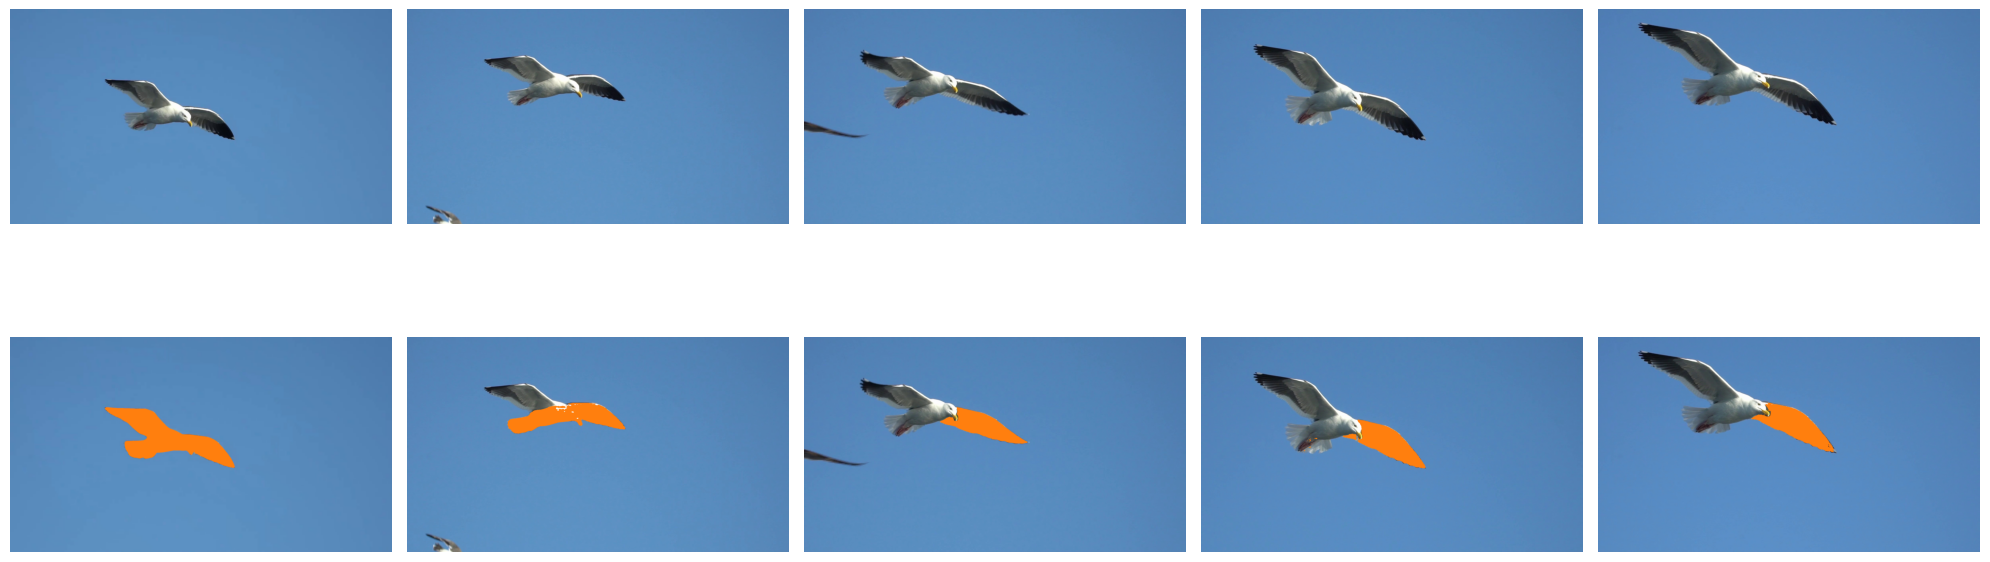

In [49]:
show_video_examples(segmasks, frames, 5)